In [ ]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


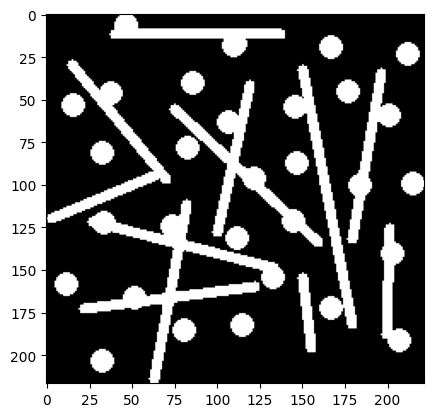

In [ ]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)


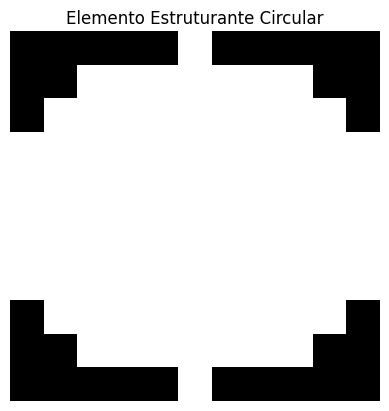

In [80]:
# Defina o raio do elemento circular
raio = 5

# Crie o elemento estruturante circular
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * raio + 1, 2 * raio + 1))

# Plotar o elemento estruturante como imagem
plt.imshow(elemento_estruturante, cmap="gray")  # cmap="gray" exibe a imagem em escala de cinza
plt.title("Elemento Estruturante Circular")  # Título do gráfico
plt.axis("off")  # Remove os eixos para melhorar a visualização
plt.show()  # Mostra a imagem


In [101]:
origem = (raio, raio)

def matriz_morfologica(img, origem=(0,0)):
    elemento = []

    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if img[i][j] > 0:
                elemento.append((i - origem[0], j - origem[1]))
    return elemento

def erosao(img_morfo, elemento_morfo):
    # Converta a imagem morfológica em um conjunto para melhorar a verificação de presença
    img_morfo_set = set(img_morfo)
    new_img = []

    for a in img_morfo:
        valid = True
        for b in elemento_morfo:
            novo_elemento = (a[0] + b[0], a[1] + b[1])
            # Verificação mais rápida usando set
            if novo_elemento not in img_morfo_set:
                valid = False
                break
        if valid:
            new_img.append(a)
    
    return new_img



def des_morfo(img, img_morfo, origem=(0,0)):
    
    new_img = np.zeros(img.shape)

    for coord in img_morfo:
        new_img[coord[0] + origem[0]][coord[1] + origem[1]] = img[coord[0] + origem[0]][coord[1] + origem[1]]
    
    return new_img


def dilatacao(img_morfo, elemento_morfo):
    # Converta a imagem morfológica para um conjunto
    new_img_set = set(img_morfo)

    # Iterar sobre os pixels da imagem e aplicar o elemento estruturante
    for a in img_morfo:
        for b in elemento_morfo:
            novo_elemento = (a[0] + b[0], a[1] + b[1])
            # Adiciona ao conjunto, evita duplicatas automaticamente
            new_img_set.add(novo_elemento)

    # Retorna a nova imagem como uma lista, se necessário
    return list(new_img_set)


def abertura(imagem, elemento):
    """Realiza a operação de abertura na imagem."""
    morfo = matriz_morfologica(imagem)
    elemento_morfo = matriz_morfologica(elemento)
    morfo = erosao(morfo, elemento_morfo)
    morfo = dilatacao(morfo, elemento_morfo)
    return des_morfo(imagem, morfo)


2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


In [87]:
def criar_elemento_estrutural_vertical():
    """Cria um elemento estruturante vertical 3x9."""
    return np.ones((9, 3), dtype=np.uint8)

In [88]:
def criar_elemento_estrutural_horizontal():
    """Cria um elemento estruturante horizontal 9x3."""
    return np.ones((3, 9), dtype=np.uint8)

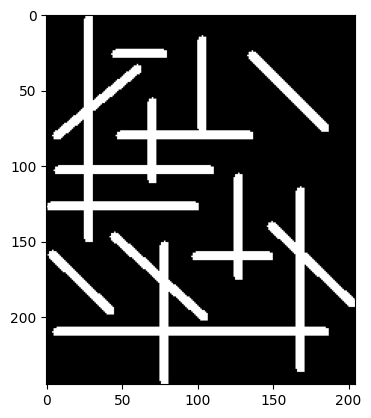

In [89]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

(-0.5, 204.5, 244.5, -0.5)

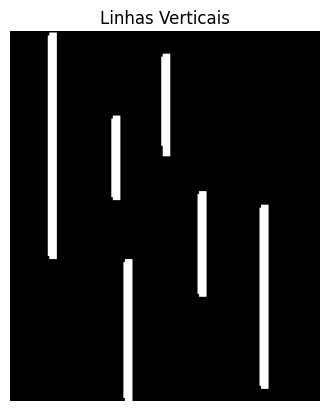

In [102]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

# Obter linhas verticais
elemento_vertical = criar_elemento_estrutural_vertical()
linhas_verticais = abertura(img2, elemento_vertical)

plt.title('Linhas Verticais')
plt.imshow(linhas_verticais, cmap='gray')
plt.axis('off')


(-0.5, 204.5, 244.5, -0.5)

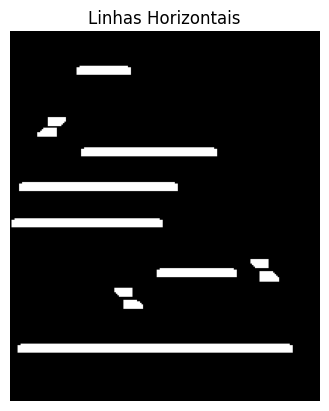

In [103]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

# Obter linhas horizontais
elemento_horizontal = criar_elemento_estrutural_horizontal()
linhas_horizontais = abertura(img2 // 255, elemento_horizontal)


plt.title('Linhas Horizontais')
plt.imshow(linhas_horizontais, cmap='gray')
plt.axis('off')

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

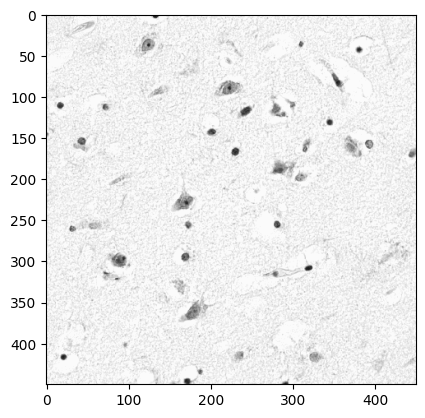

In [104]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

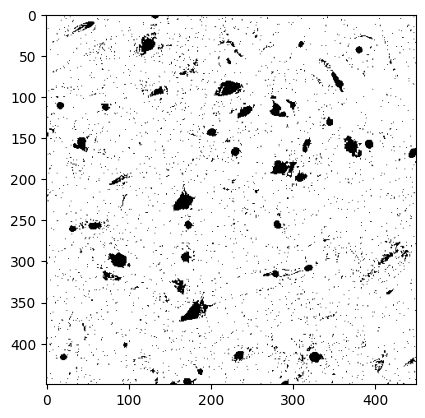

In [105]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

_, imagem_binaria = cv2.threshold(img3, 210, 1, cv2.THRESH_BINARY)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)


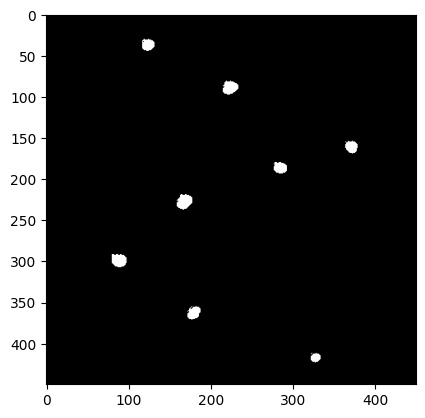

In [109]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

_, imagem_binaria = cv2.threshold(img3, 210, 1, cv2.THRESH_BINARY_INV)

# Defina o raio do elemento circular
raio = 5

# Crie o elemento estruturante circular
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * raio + 1, 2 * raio + 1))

# Aplicar a operação de abertura para reter as células grandes
imagem_abertura = abertura(imagem_binaria, elemento_estruturante)

plt.imshow(imagem_abertura, cmap='gray', vmin=0, vmax=1)

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

In [110]:
def rotulacao_componentes_conexos(imagem_binaria):
    # Inicializando rótulos
    imagem_rotulada = np.zeros_like(imagem_binaria, dtype=np.int32)
    rotulo = 1
    
    # Definindo as vizinhanças
    vizinhos = [(-1, 0), (0, -1)]  # Apenas acima e à esquerda
    
    # Passo 1: Varredura inicial da imagem
    for i in range(imagem_binaria.shape[0]):
        for j in range(imagem_binaria.shape[1]):
            if imagem_binaria[i, j] == 1:  # Se o pixel pertence a um componente
                # Verificar vizinhos
                rotulos_vizinhos = []
                for dx, dy in vizinhos:
                    x, y = i + dx, j + dy
                    if 0 <= x < imagem_binaria.shape[0] and 0 <= y < imagem_binaria.shape[1]:
                        if imagem_rotulada[x, y] > 0:
                            rotulos_vizinhos.append(imagem_rotulada[x, y])
                
                if not rotulos_vizinhos:
                    # Nenhum vizinho está rotulado, atribuir um novo rótulo
                    imagem_rotulada[i, j] = rotulo
                    rotulo += 1
                else:
                    # Atribuir o menor rótulo encontrado nos vizinhos
                    menor_rotulo = min(rotulos_vizinhos)
                    imagem_rotulada[i, j] = menor_rotulo
                    # Unificar rótulos diferentes se necessário
                    for rot in rotulos_vizinhos:
                        if rot != menor_rotulo:
                            imagem_rotulada[imagem_rotulada == rot] = menor_rotulo
    
    # Passo 2: Normalizar os rótulos para facilitar a visualização
    rotulos_unicos = np.unique(imagem_rotulada)
    for novo_rotulo, rotulo_antigo in enumerate(rotulos_unicos):
        imagem_rotulada[imagem_rotulada == rotulo_antigo] = novo_rotulo
    
    
    return imagem_rotulada

In [111]:
# Função para calcular o threshold de Otsu manualmente
def otsu_threshold(image):
    # Calcula o histograma da imagem
    hist, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size
    
    # Variáveis para calcular a probabilidade acumulada e média
    sumB = 0
    wB = 0
    sum1 = np.dot(np.arange(256), hist)
    var_max = 0.0
    threshold = 0
    
    # Loop para calcular a variância entre classes para cada threshold
    for i in range(256):
        wB += hist[i]  # Peso da classe background
        if wB == 0:
            continue
        wF = total_pixels - wB  # Peso da classe foreground
        if wF == 0:
            break
        sumB += i * hist[i]
        mB = sumB / wB  # Média da classe background
        mF = (sum1 - sumB) / wF  # Média da classe foreground
        var_between = wB * wF * (mB - mF) ** 2  # Variância entre classes
        
        # Maximiza a variância entre classes
        if var_between > var_max:
            var_max = var_between
            threshold = i

    return threshold

# Função para aplicar o threshold manual de Otsu
def apply_otsu_manual(image):
    threshold = otsu_threshold(image)
    # Aplica o threshold para segmentar a imagem
    _, imagem_binaria = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
    return imagem_binaria, threshold

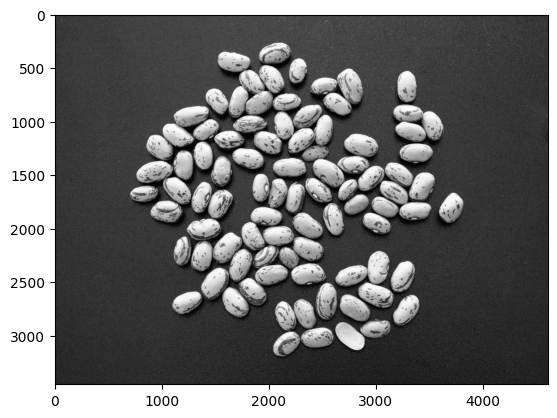

In [ ]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

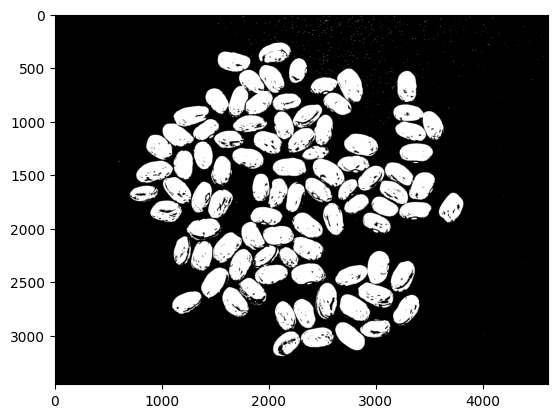

In [139]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

# segmented_image, threshold = apply_otsu_manual(img4)
_, imagem_binaria = cv2.threshold(img4, 100, 1, cv2.THRESH_BINARY)


plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)

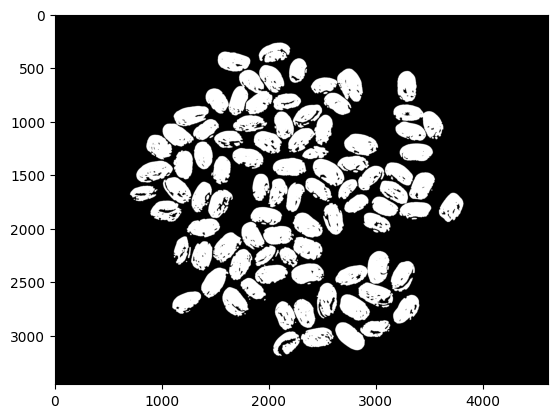

In [132]:
raio = 5
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * raio + 1, 2 * raio + 1))

# Aplicar a operação de abertura para reter as células grandes
imagem_abertura = abertura(imagem_binaria, elemento_estruturante)

plt.imshow(imagem_abertura, cmap='gray', vmin=0, vmax=1)

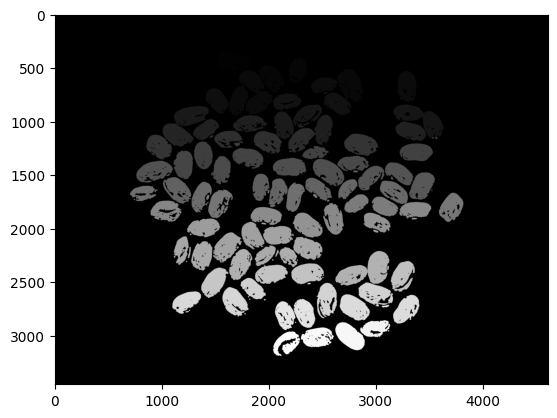

In [134]:
# Rotulação utilizando 4-vizinhança
imagem_rotulada_4 = rotulacao_componentes_conexos(imagem_abertura)

# Normalizar os resultados para salvar como imagens PNG
imagem_rotulada_4_norm = (imagem_rotulada_4 / imagem_rotulada_4.max() * 255).astype(np.uint8)

# # Salvar as imagens rotuladas
plt.imshow(imagem_rotulada_4_norm, cmap='gray', vmin=0, vmax=255)

In [137]:

qtd_feijoes = len(np.unique(imagem_rotulada_4)) - 1 # Subtrair 1 para excluir o fundo (rótulo 0)

print(qtd_feijoes)

294


5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

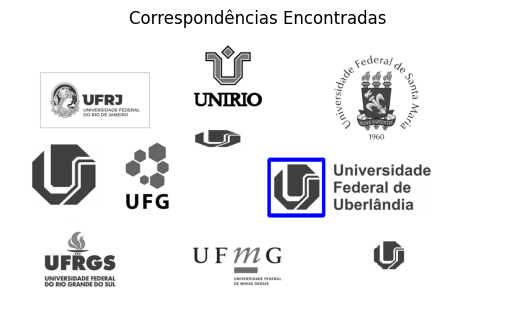

In [ ]:
img5 = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img5, cmap='gray', vmin=0, vmax=255)

# Carregar a imagem de entrada e a imagem de referência
imagem_entrada = cv2.imread('logotipos.png', 0)  # Em escala de cinza
imagem_referencia = cv2.imread('logo_ufu.png', 0)  # Em escala de cinza

# Obter as dimensões da imagem de referência
altura, largura = imagem_referencia.shape[:2]

# Executar o template matching
resultado = cv2.matchTemplate(imagem_entrada, imagem_referencia, cv2.TM_CCOEFF_NORMED)

# Definir um limiar para a correspondência (ajustável conforme necessidade)
limiar = 0.8
localizacao = np.where(resultado >= limiar)

# Marcar os locais correspondentes na imagem de entrada
imagem_resultado = cv2.cvtColor(imagem_entrada, cv2.COLOR_GRAY2BGR)
for pt in zip(*localizacao[::-1]):  # Inverter as coordenadas para (x, y)
    cv2.rectangle(imagem_resultado, pt, (pt[0] + largura, pt[1] + altura), (0, 0, 255), 2)

# Exibir a imagem de entrada com as correspondências encontradas
plt.imshow(imagem_resultado)
plt.title('Correspondências Encontradas')
plt.axis('off')
plt.show()

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original